# Sanity Checks on a fixed TC Ground State!

In [1]:
using Base.Filesystem  # for creaating directories etc
using Random, Distributions  # random numbers
using HDF5  # hdf5 files
using QuantumClifford  # this is the stabilizer simulation package
using Plots # for plotting
using Formatting # string formatting
using LinearAlgebra # some useful matrices etc.
include("AdditionalStructure/NewTypes.jl")
include("AdditionalStructure/BitStringOps.jl")
include("AdditionalStructure/Measurements.jl")
include("AdditionalStructure/MICModels.jl")
include("AdditionalStructure/ModelRuns.jl")
include("AdditionalStructure/HelperTools.jl")
include("AdditionalStructure/Iterators.jl");

In [2]:
# Geometry and other useful constant are packed in this struct, EdgeSquareLattice and VertexSquareLattice

# subsystem = 2
# system = Init_EdgeSquareLattice(subsystem)
L = 17
d = 2
system = Init_EdgeSquareLattice_KitaevDoNuT(L, d)

L = system.L
nbits = system.nbits

# state = toric_code_GS(system, true, true)
state = toric_code_GS_MIXED(system)
p_anyon = 0.5 # The change of applying an anyon of a given type vs a TC stabiliser!
p_tc = 1 - p_anyon
stab_distro = Categorical([p_tc/2, p_tc/2, 0, 0, p_anyon]) # In this case we condense f particles!
state = iterate_measurements_only!(state, system, () -> toric_code(system, stab_distro), Int(1e4))

println("EE=", entanglement_entropy(state, 1:nbits, Val(:clip)))
println("TEN=", entanglement_negativity(state, system))
println("TEE=", entanglement_entropy_topo(state, system))

EE=0
TEN=

-15.5


TEE=1


In [3]:
r_A = system.r_A
r_B = system.r_B
r_C = system.r_C
r_AB = system.r_AB
r_BC = system.r_BC
r_ABC = system.r_ABC

S = system.S
P_A = system.P_A
P_B = system.P_B
P_C = system.P_C

T = stab_to_gf2(stabilizerview(state))'

e_A = entanglement_entropy(state, r_A, Val(:rref))
e_B = entanglement_entropy(state, r_B, Val(:rref))
e_C = entanglement_entropy(state, r_C, Val(:rref))
e_AB = entanglement_entropy(state, r_AB, Val(:rref))
e_BC = entanglement_entropy(state, r_BC, Val(:rref))
e_ABC = entanglement_entropy(state, r_ABC, Val(:rref))
e_AC = entanglement_entropy(state, [r_A; r_C], Val(:rref))

println("e_A=", e_A)
println("e_B=", e_B)
println("e_C=", e_C)
println("e_AB=", e_AB)
println("e_BC=", e_BC)
println("e_AC=", e_AC)
println("e_ABC=", e_ABC)

e_A=52
e_B=49
e_C=44
e_AB=72
e_BC=73
e_AC=96
e_ABC=95


In [4]:
S = system.S
P_A = system.P_A
P_B = system.P_B
P_C = system.P_C

T = stab_to_gf2(stabilizerview(state))'

K = T'*(P_A)*S*(P_A)*T
K = K.%2
K = K.!=0
e_A = rank(K)/2
K = T'*(P_B)*S*(P_B)*T
K = K.%2
K = K.!=0
e_B = rank(K)/2
K = T'*(P_C)*S*(P_C)*T
K = K.%2
K = K.!=0
e_C = rank(K)/2
K = T'*(P_A+P_B)*S*(P_A+P_B)*T
K = K.%2
K = K.!=0
e_AB = rank(K)/2
K = T'*(P_A+P_C)*S*(P_A+P_C)*T
K = K.%2
K = K.!=0
e_AC = rank(K)/2
K = T'*(P_B+P_C)*S*(P_B+P_C)*T
K = K.%2
K = K.!=0
e_BC = rank(K)/2
K = T'*(P_A+P_B+P_C)*S*(P_A+P_B+P_C)*T
K = K.%2
K = K.!=0
e_ABC = rank(K)/2

println("e_A=", e_A)
println("e_B=", e_B)
println("e_C=", e_C)
println("e_AB=", e_AB)
println("e_BC=", e_BC)
println("e_AC=", e_AC)
println("e_ABC=", e_ABC)

e_A=68.0
e_B=59.0
e_C=69.5
e_AB=90.5
e_BC=90.5
e_AC=127.5
e_ABC=106.0


In [5]:
println("L=",system.L)
println("nbits=",system.nbits)
println("cell_num=",system.cell_num)
println("subsys=",system.subsys)
println("subsys_size=",system.subsys_size)

L=17
nbits=578
cell_num=289
subsys=2
subsys_size=178


In [6]:
# canonicalize!(state);

In [7]:
state_d = deepcopy(state)
state_d = traceout!(state_d, setdiff(1:nbits, r_B))
length((stabilizerview(state_d)))

51

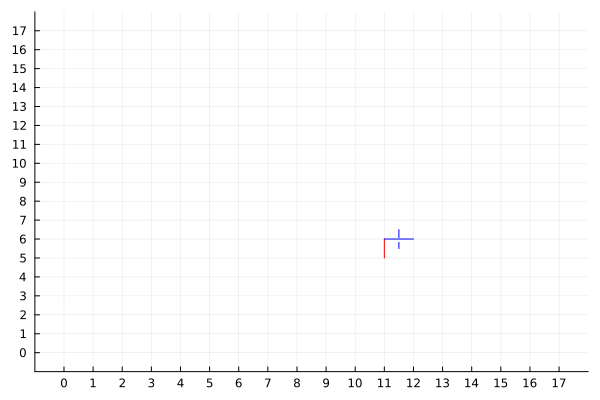

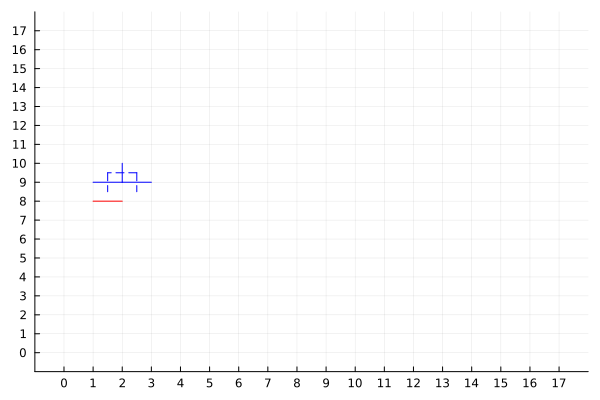

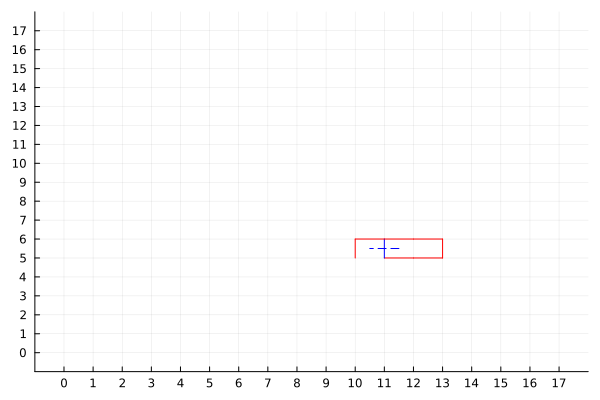

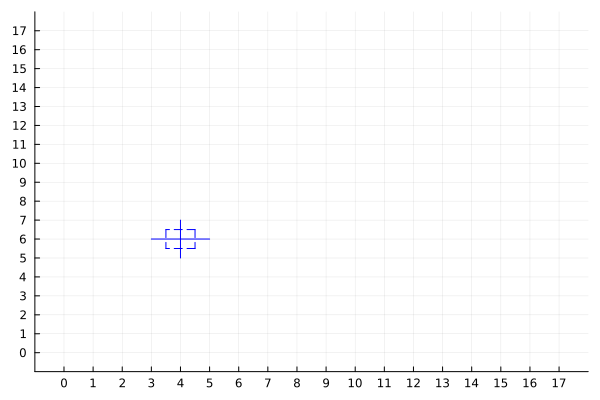

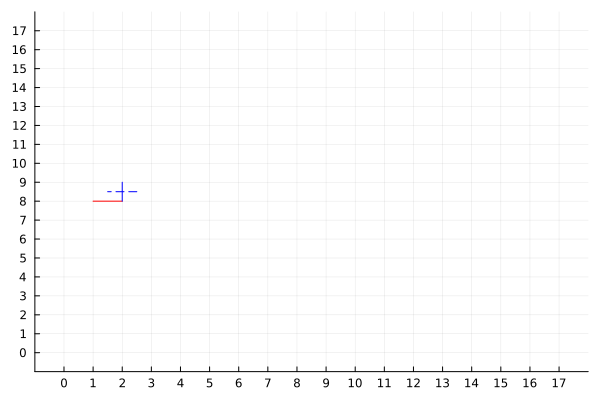

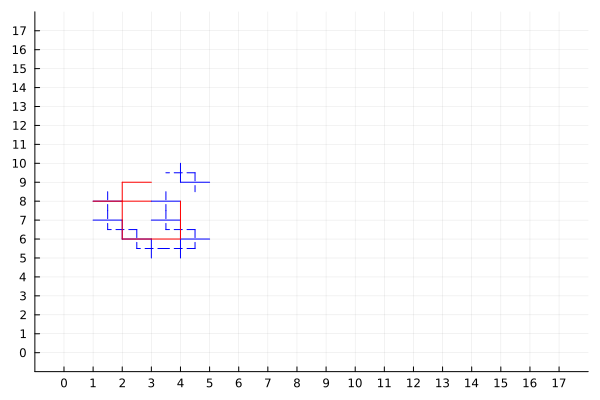

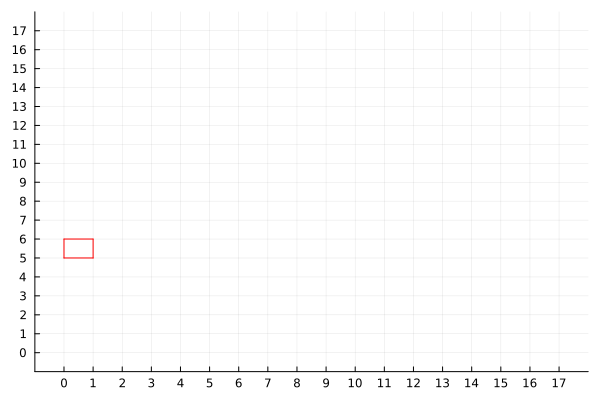

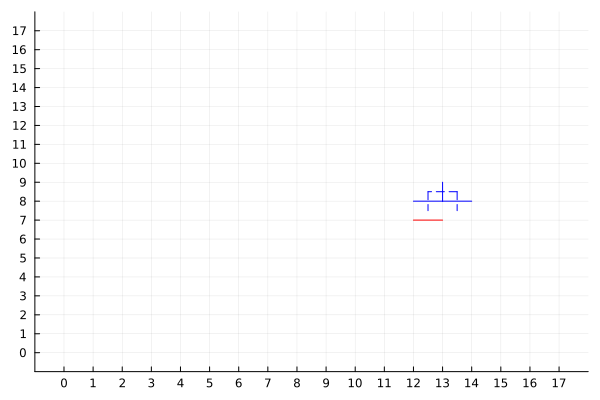

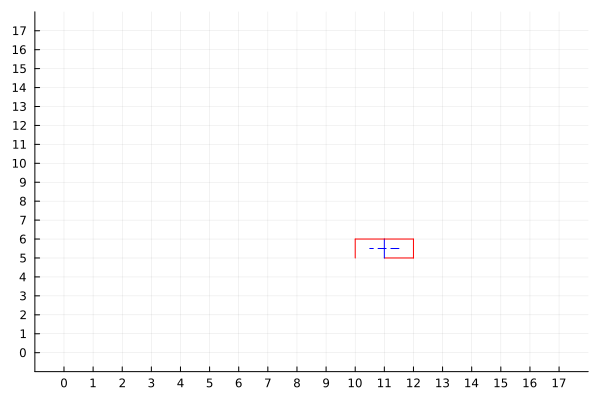

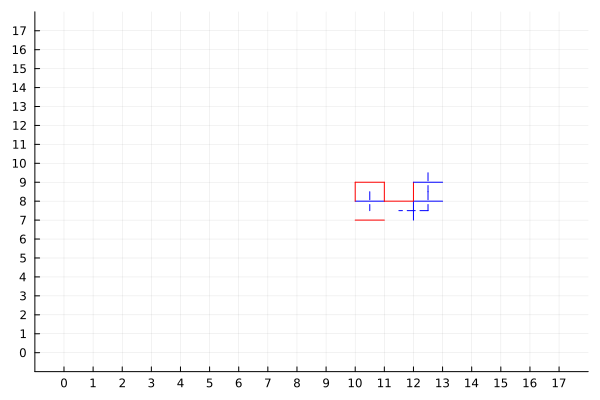

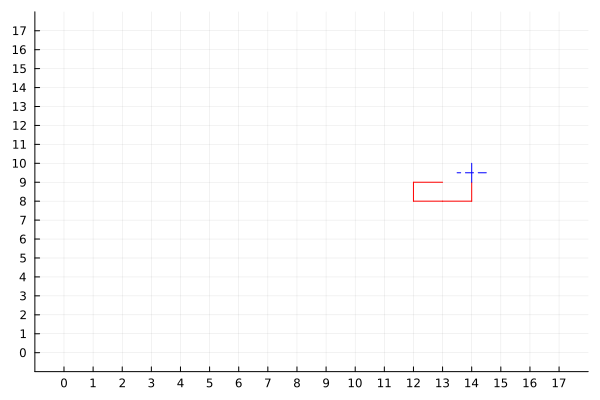

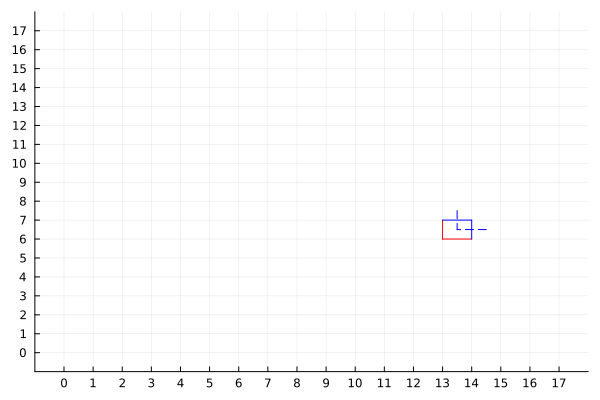

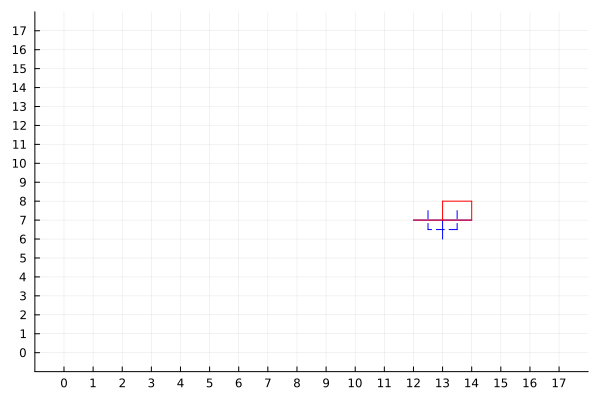

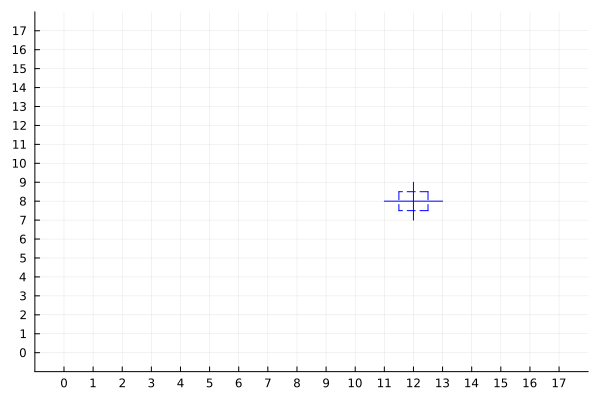

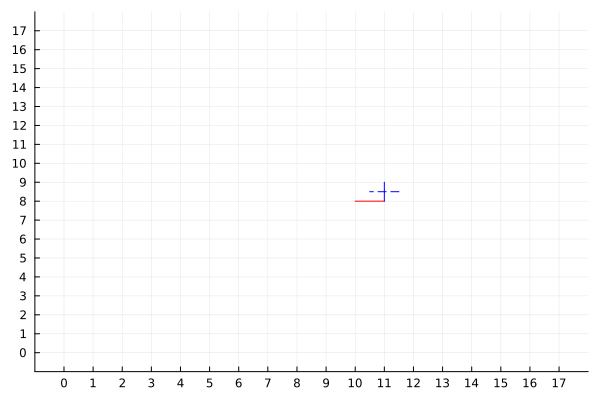

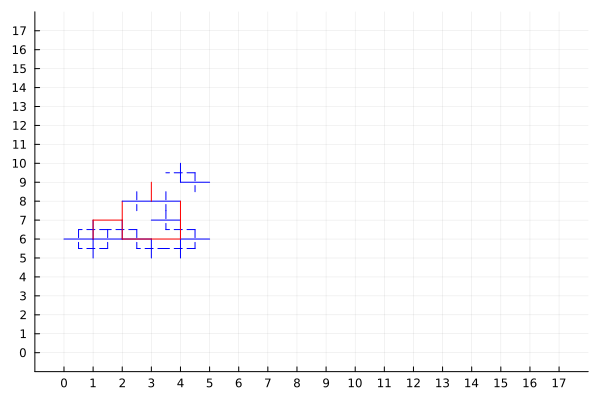

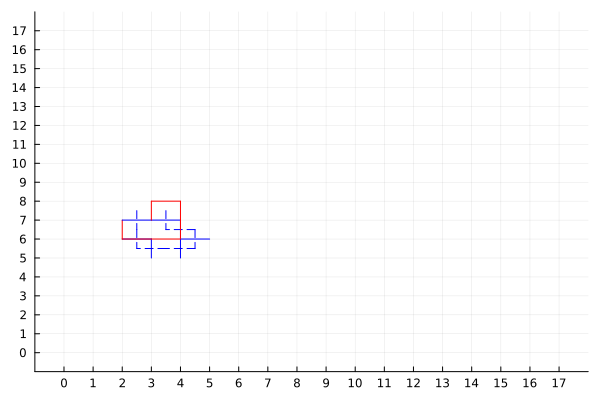

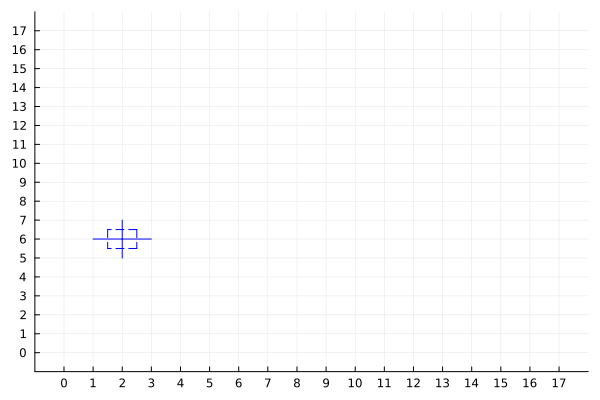

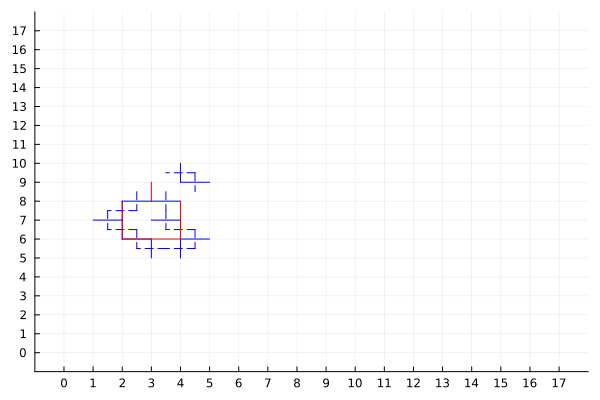

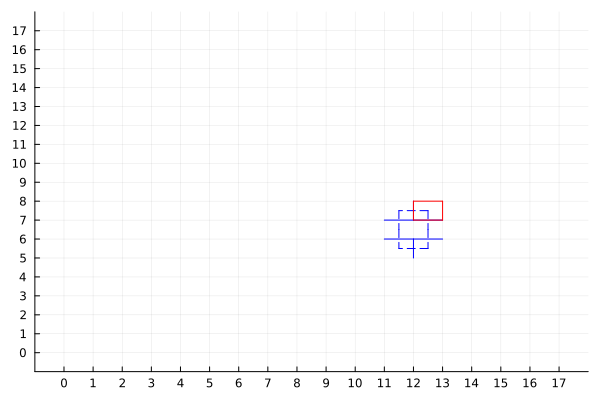

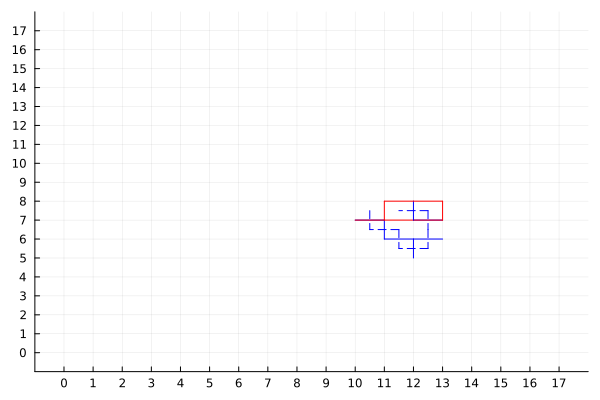

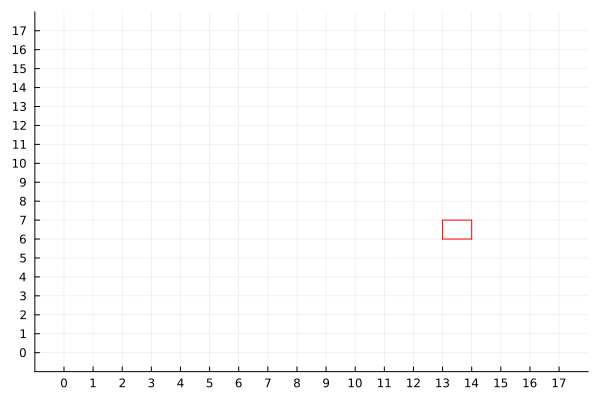

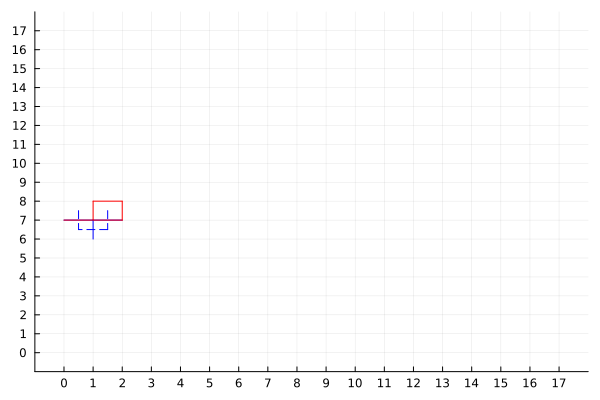

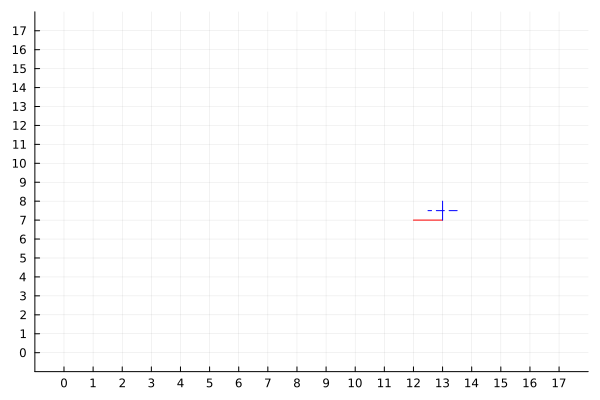

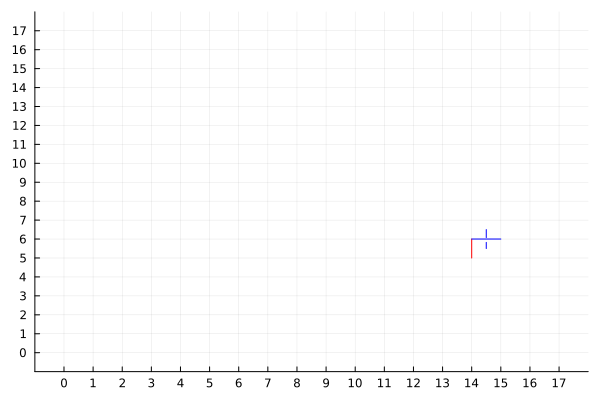

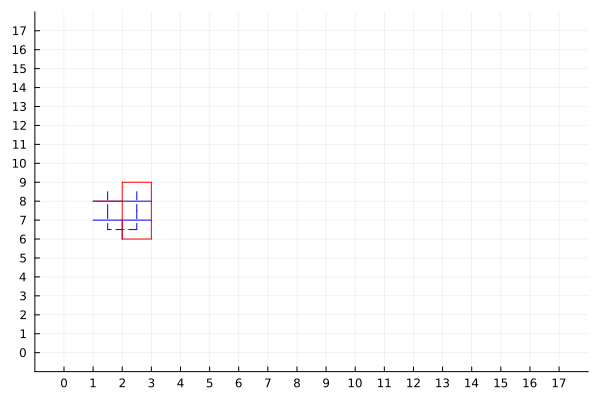

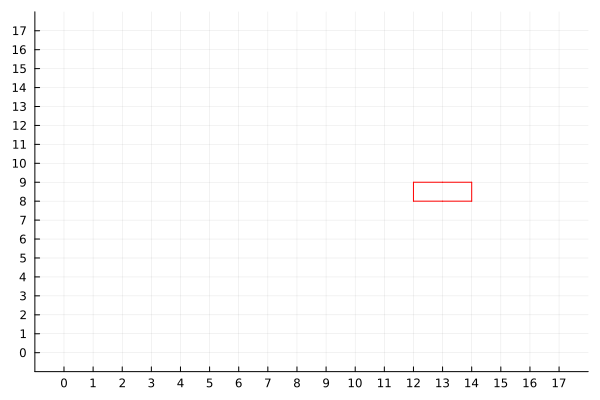

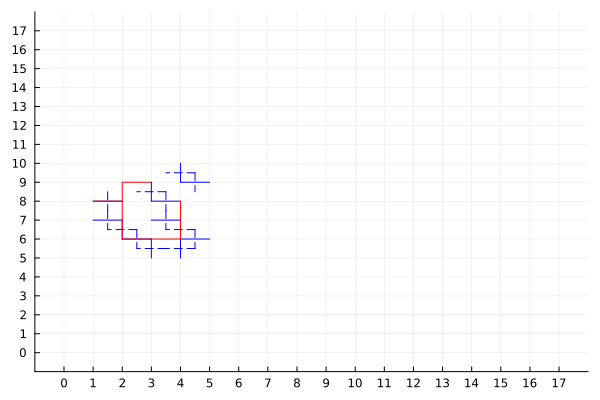

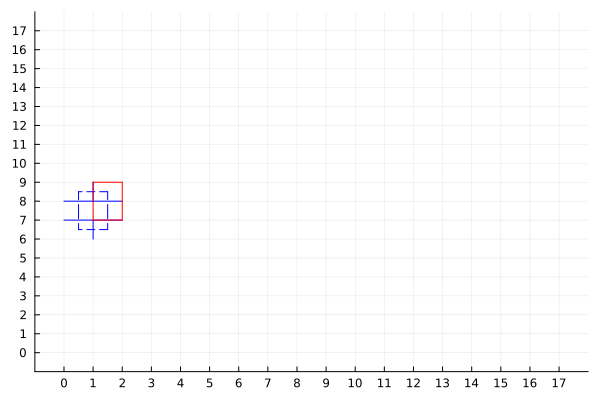

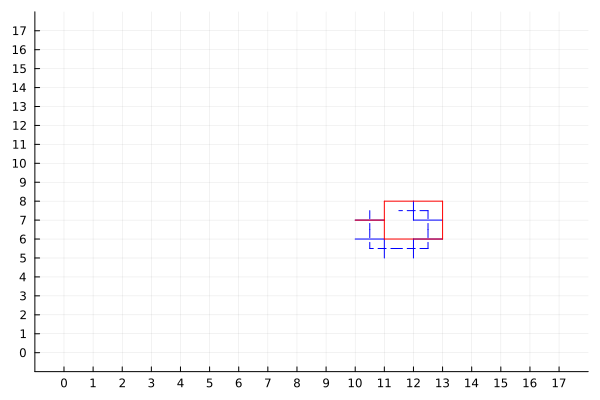

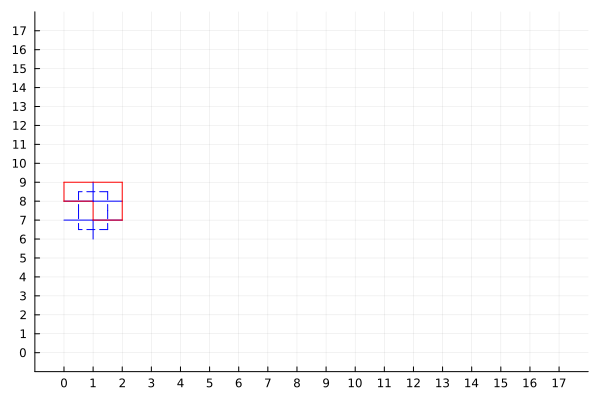

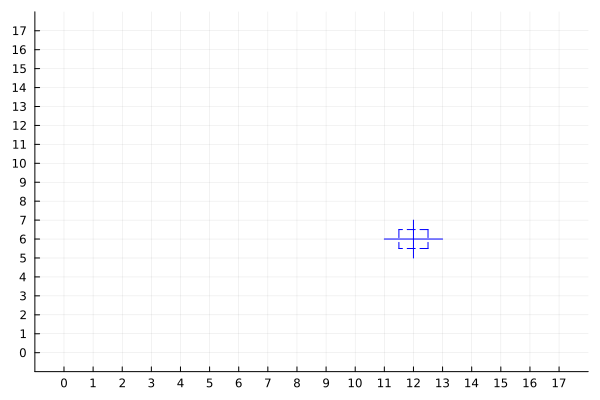

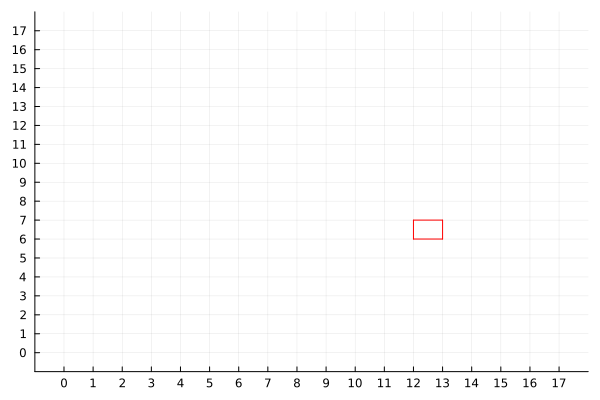

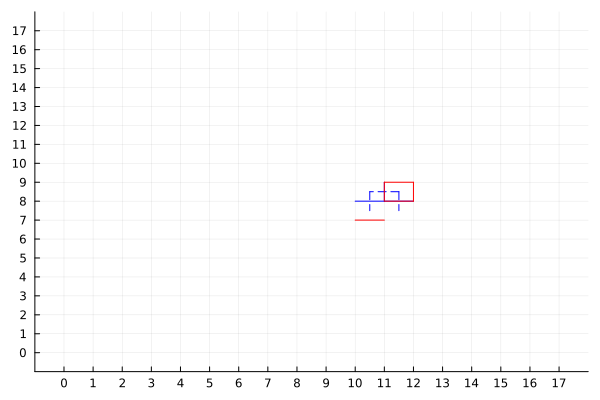

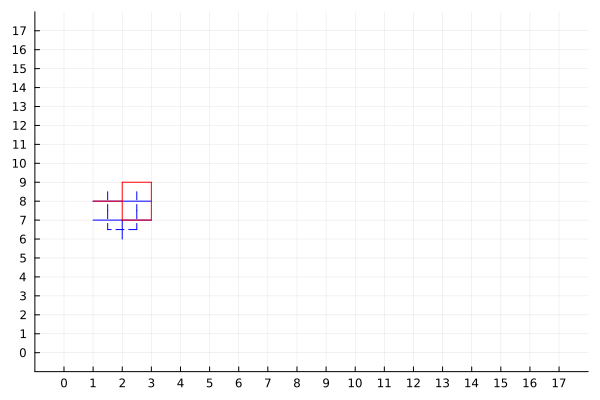

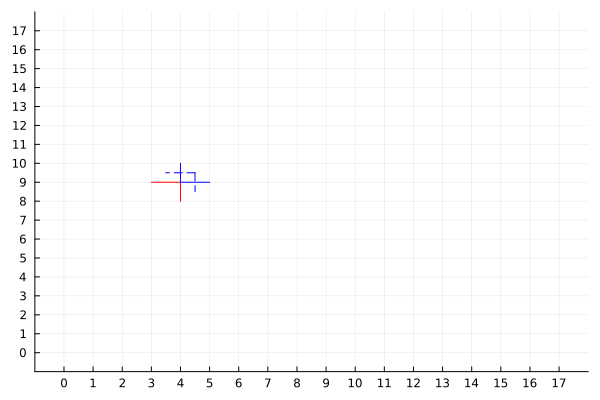

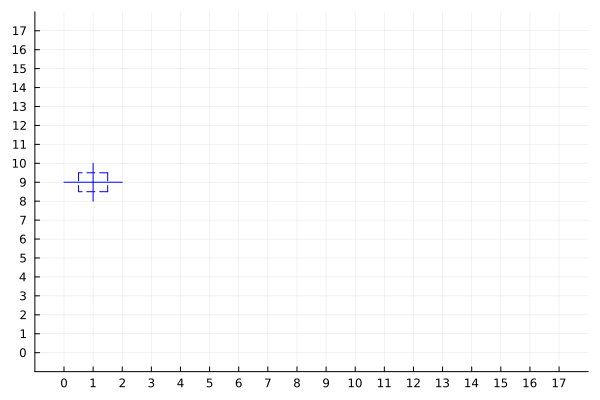

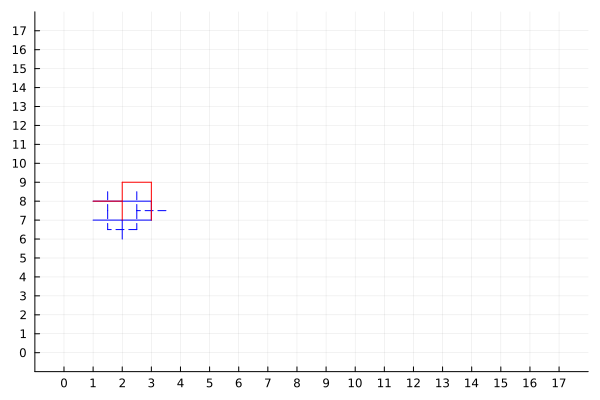

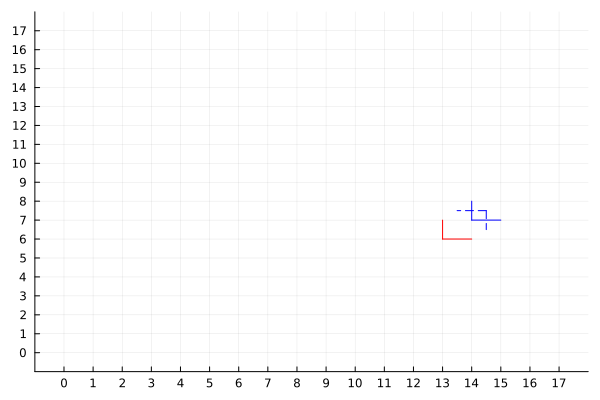

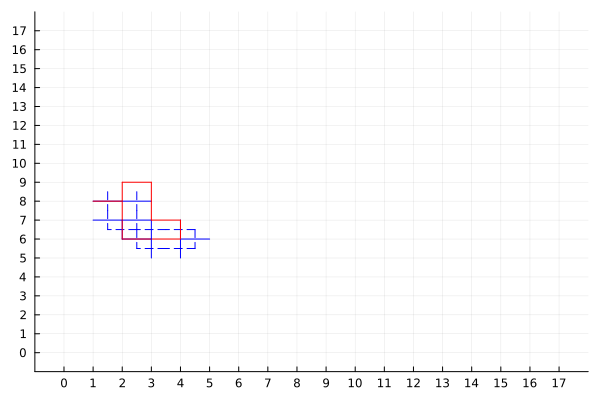

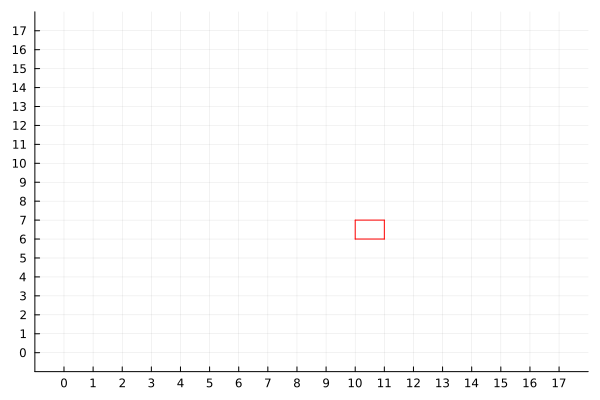

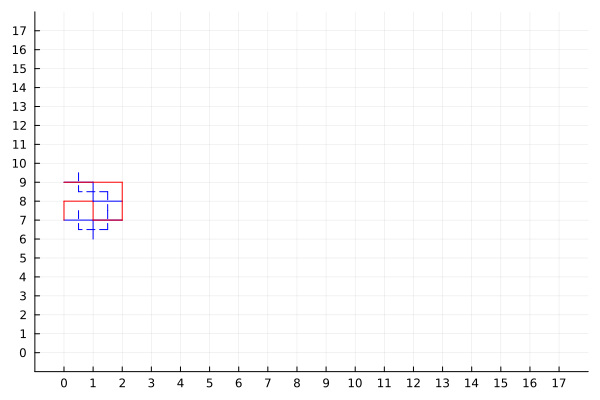

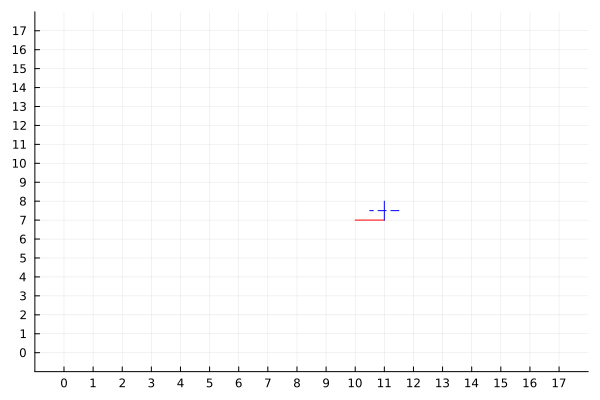

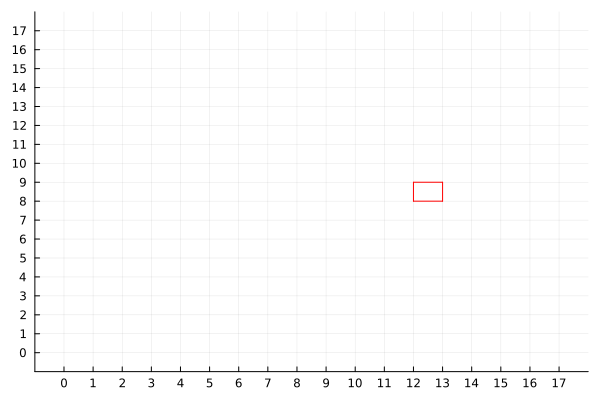

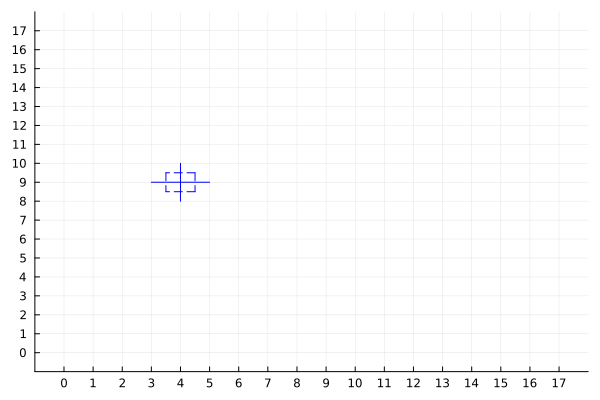

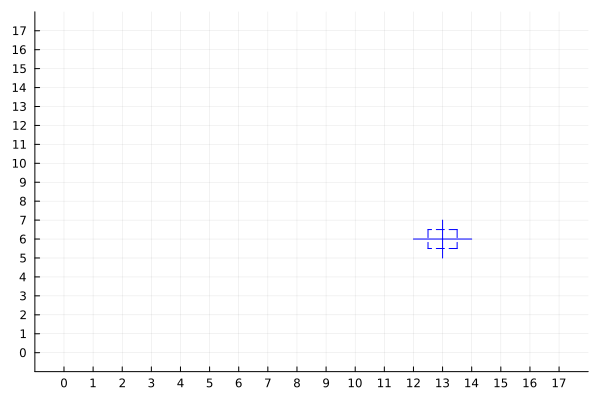

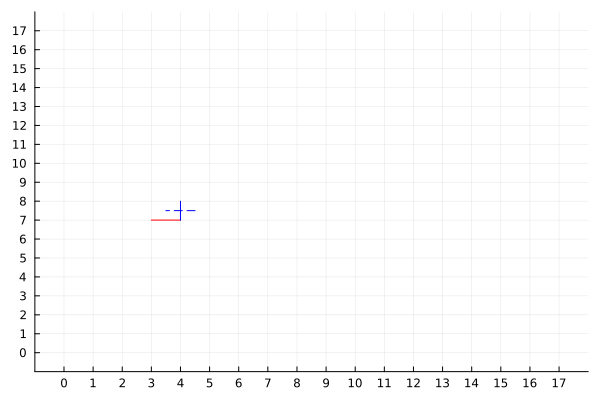

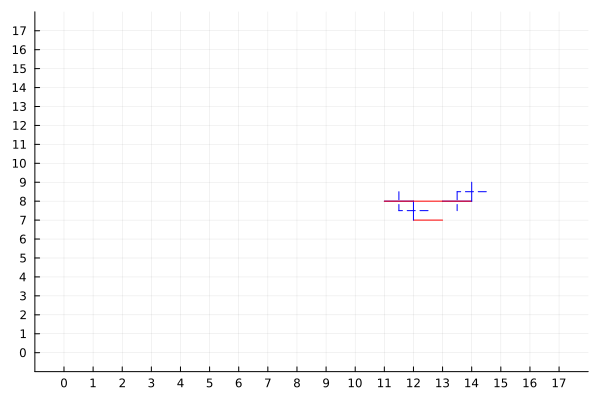

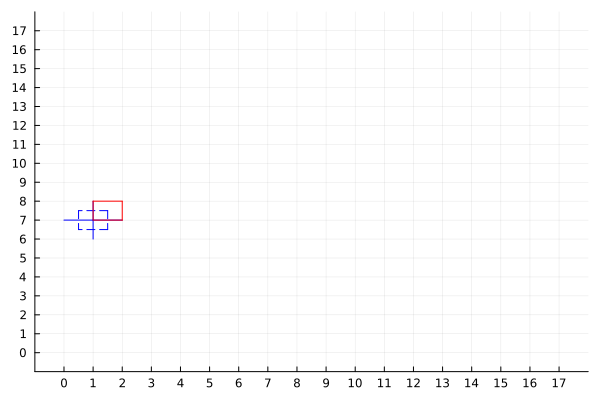

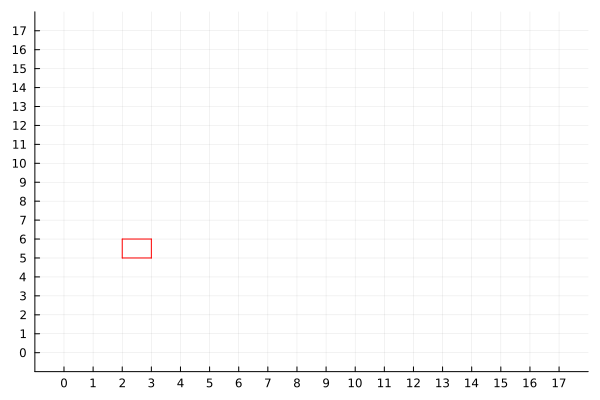

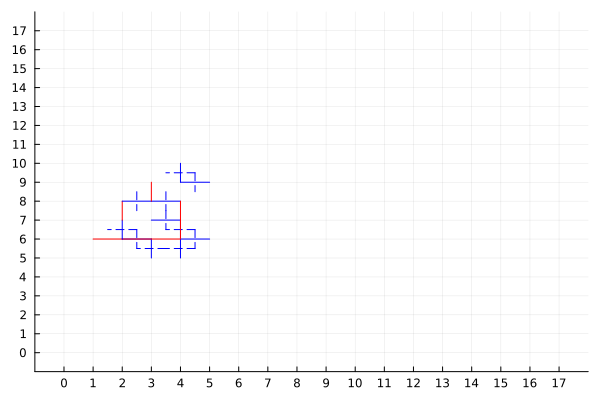

In [8]:
for i_stab = 1:length((stabilizerview(state_d)))
    visualise_the_stabiliser(stabilizerview(state_d)[i_stab], system)
end